In [31]:
import numpy as np
import matplotlib.pyplot as plt

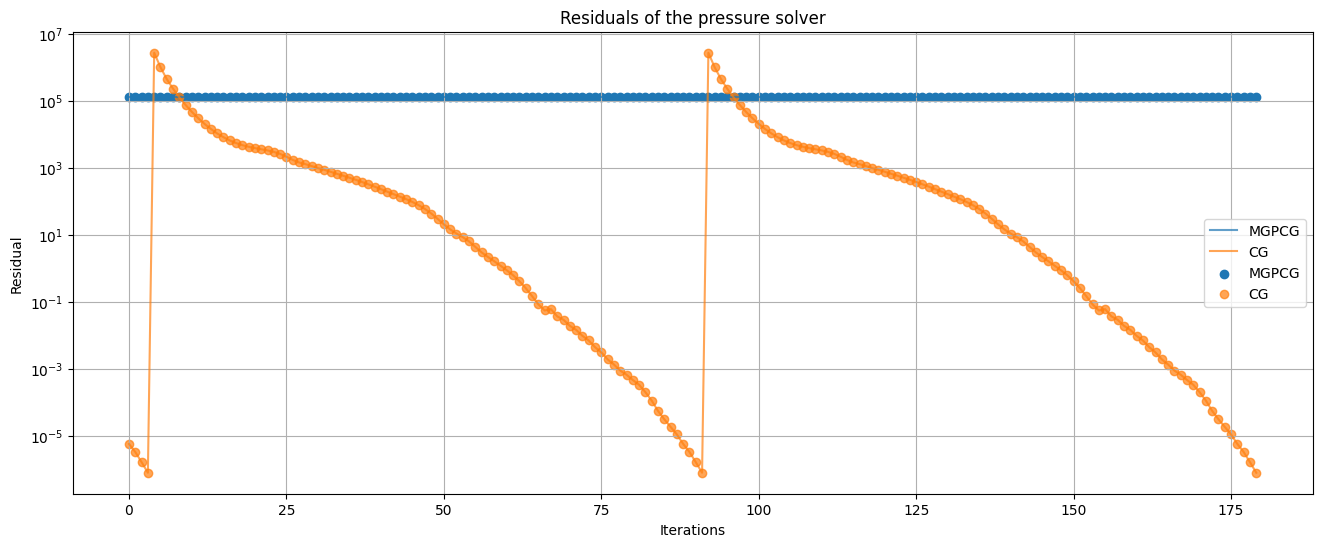

In [44]:
mgpcg_residuals = np.loadtxt("experiments/2d/mgpcg/residuals_with_pressure_solver.dat")
cg_residuals = np.loadtxt("experiments/2d/conjugate_gradient/residuals_with_pressure_solver.dat")

# first 40 iterations
mgpcg_residuals = mgpcg_residuals[-180:]
cg_residuals = cg_residuals[-180:]

# Plot the residuals

# Set title ()
plt.figure(figsize=(16, 6))
plt.title("Residuals of the pressure solver")
plt.plot(mgpcg_residuals, label="MGPCG", alpha=0.7)
plt.plot(cg_residuals, label="CG", alpha=0.7)
# scatter plot
plt.scatter(np.arange(len(mgpcg_residuals)), mgpcg_residuals, label="MGPCG")
plt.scatter(np.arange(len(cg_residuals)), cg_residuals, label="CG", alpha=0.7)

plt.yscale("log")
plt.xlabel("Iterations")
plt.ylabel("Residual")
plt.legend()
# grid lines
plt.grid(True)
plt.show()

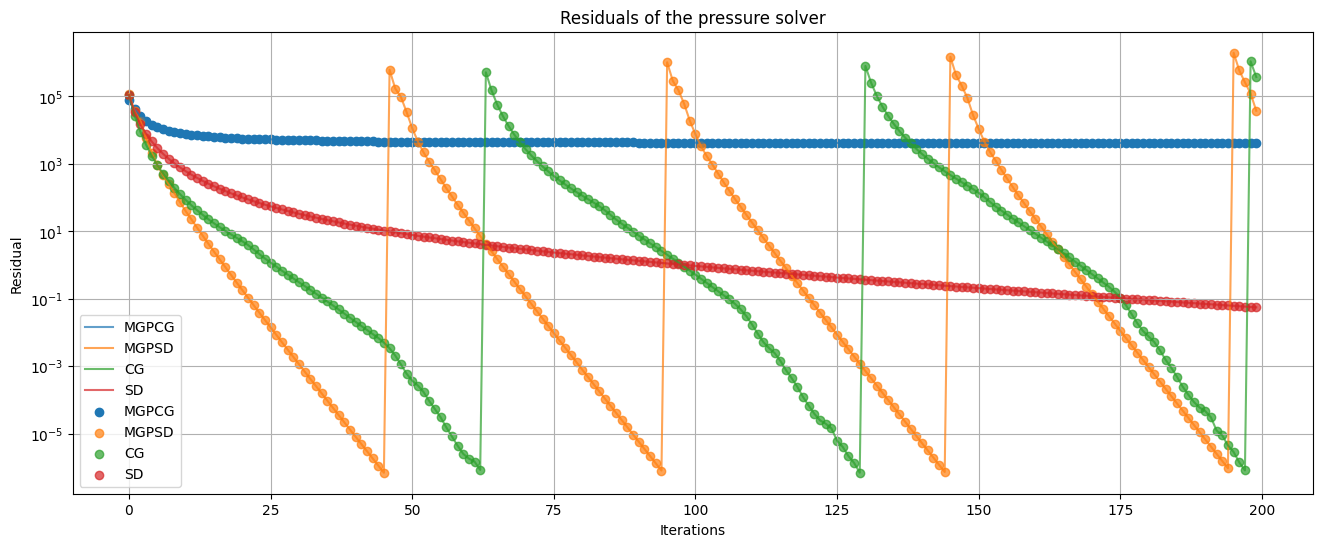

In [32]:
mgpcg_residuals = np.loadtxt("experiments/2d/mgpcg/residuals_with_pressure_solver.dat")
mgpsd_residuals = np.loadtxt("experiments/2d/mgpsd/residuals_with_pressure_solver.dat")
cg_residuals = np.loadtxt("experiments/2d/conjugate_gradient/residuals_with_pressure_solver.dat")
sd_residuals = np.loadtxt("experiments/2d/steepest_descent/residuals_with_pressure_solver.dat")

# first 40 iterations
mgpcg_residuals = mgpcg_residuals[:200]
mgpsd_residuals = mgpsd_residuals[:200]
cg_residuals = cg_residuals[:200]
sd_residuals = sd_residuals[:200]

# Plot the residuals

# Set title ()
plt.figure(figsize=(16, 6))
plt.title("Residuals of the pressure solver")
plt.plot(mgpcg_residuals, label="MGPCG", alpha=0.7)
plt.plot(mgpsd_residuals, label="MGPSD", alpha=0.7)
plt.plot(cg_residuals, label="CG", alpha=0.7)
plt.plot(sd_residuals, label="SD", alpha=0.7)
# scatter plot
plt.scatter(np.arange(len(mgpcg_residuals)), mgpcg_residuals, label="MGPCG")
plt.scatter(np.arange(len(mgpsd_residuals)), mgpsd_residuals, label="MGPSD", alpha=0.7)
plt.scatter(np.arange(len(cg_residuals)), cg_residuals, label="CG", alpha=0.7)
plt.scatter(np.arange(len(sd_residuals)), sd_residuals, label="SD", alpha=0.7)

plt.yscale("log")
plt.xlabel("Iterations")
plt.ylabel("Residual")
plt.legend()
# grid lines
plt.grid(True)
plt.show()

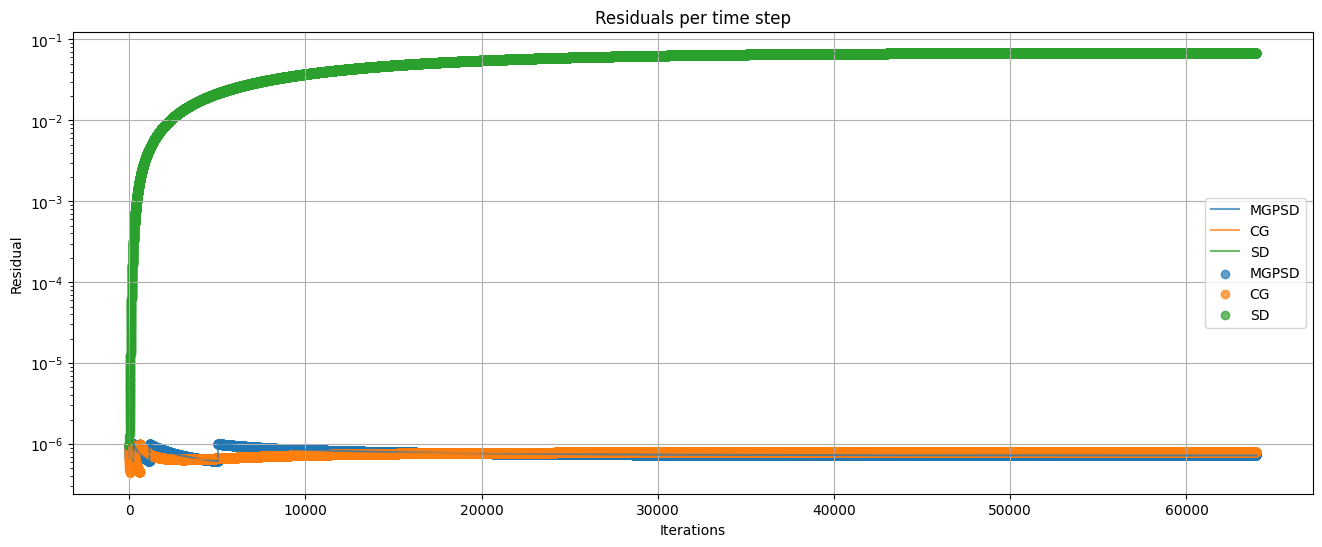

In [38]:
mgpsd_residuals = np.loadtxt("experiments/2d/mgpsd/residuals_without_pressure_solver.dat")
cg_residuals = np.loadtxt("experiments/2d/conjugate_gradient/residuals_without_pressure_solver.dat")
sd_residuals = np.loadtxt("experiments/2d/steepest_descent/residuals_without_pressure_solver.dat")

# first 40 iterations
mgpsd_residuals = mgpsd_residuals
cg_residuals = cg_residuals
sd_residuals = sd_residuals

# Plot the residuals

# Set title ()
plt.figure(figsize=(16, 6))
plt.title("Residuals per time step")
plt.plot(mgpsd_residuals, label="MGPSD", alpha=0.7)
plt.plot(cg_residuals, label="CG", alpha=0.7)
plt.plot(sd_residuals, label="SD", alpha=0.7)
# scatter plot
plt.scatter(np.arange(len(mgpsd_residuals)), mgpsd_residuals, label="MGPSD", alpha=0.7)
plt.scatter(np.arange(len(cg_residuals)), cg_residuals, label="CG", alpha=0.7)
plt.scatter(np.arange(len(sd_residuals)), sd_residuals, label="SD", alpha=0.7)

plt.yscale("log")
plt.xlabel("Iterations")
plt.ylabel("Residual")
plt.legend()
# grid lines
plt.grid(True)
plt.show()

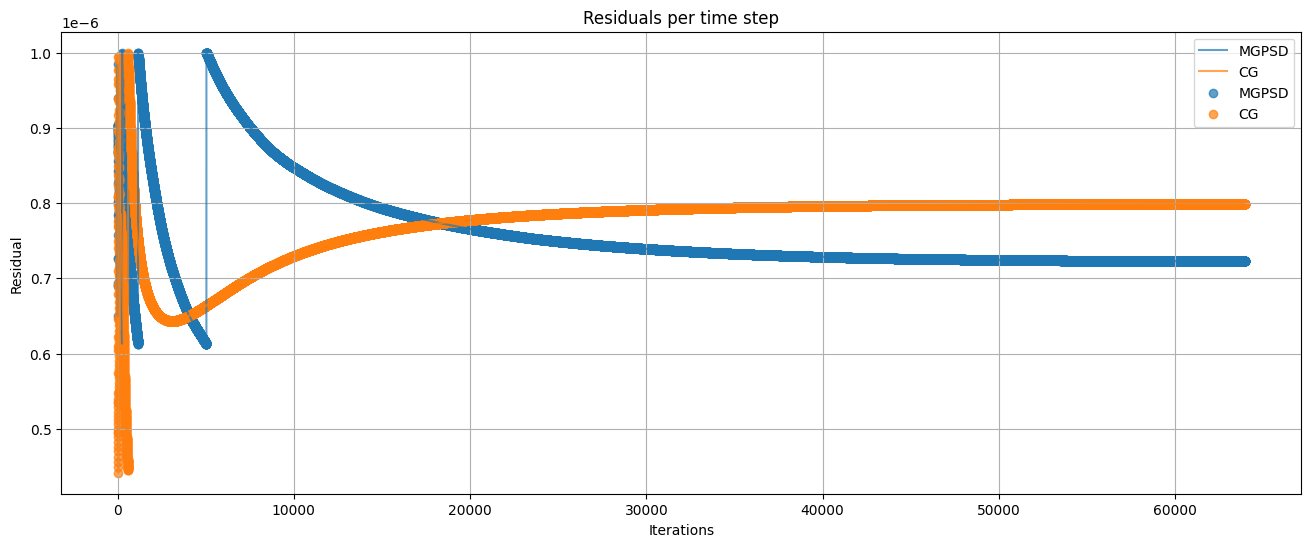

In [41]:
mgpsd_residuals = np.loadtxt("experiments/2d/mgpsd/residuals_without_pressure_solver.dat")
cg_residuals = np.loadtxt("experiments/2d/conjugate_gradient/residuals_without_pressure_solver.dat")

# first 40 iterations
mgpsd_residuals = mgpsd_residuals
cg_residuals = cg_residuals

# Plot the residuals

# Set title ()
plt.figure(figsize=(16, 6))
plt.title("Residuals per time step")
plt.plot(mgpsd_residuals, label="MGPSD", alpha=0.7)
plt.plot(cg_residuals, label="CG", alpha=0.7)
# scatter plot
plt.scatter(np.arange(len(mgpsd_residuals)), mgpsd_residuals, label="MGPSD", alpha=0.7)
plt.scatter(np.arange(len(cg_residuals)), cg_residuals, label="CG", alpha=0.7)

plt.xlabel("Iterations")
plt.ylabel("Residual")
plt.legend()
# grid lines
plt.grid(True)
plt.show()

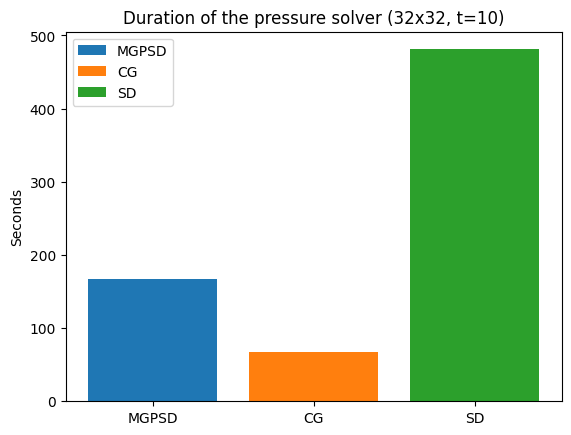

In [36]:
# plot bar charts of number of iterations
mgpsd_duration = len(np.loadtxt("experiments/2d/mgpsd/residuals_over_time.dat"))
cg_duration = len(np.loadtxt("experiments/2d/conjugate_gradient/residuals_over_time.dat"))
sd_duration = len(np.loadtxt("experiments/2d/steepest_descent/residuals_over_time.dat"))
fig, ax = plt.subplots()
ax.bar("MGPSD", mgpsd_duration, label="MGPSD")
ax.bar("CG", cg_duration, label="CG")
ax.bar("SD", sd_duration, label="SD")
plt.title("Duration of the pressure solver (32x32, t=10)")
plt.ylabel("Seconds")
plt.legend()
plt.show()

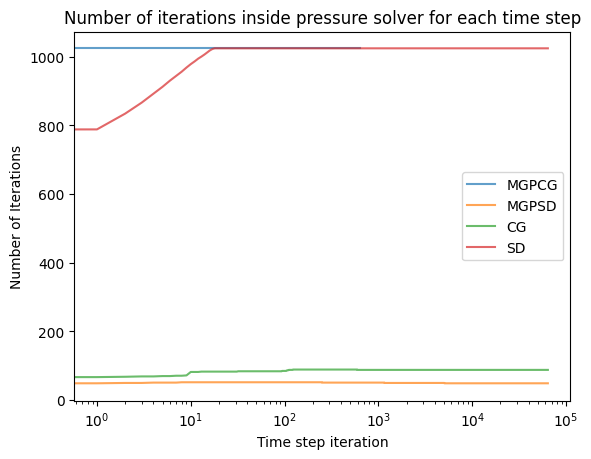

In [34]:
n_cg_mgpcg = np.loadtxt("experiments/2d/mgpcg/n_cg_over_it.dat")
n_cg_mgpsd = np.loadtxt("experiments/2d/mgpsd/n_cg_over_it.dat")
n_cg_cg = np.loadtxt("experiments/2d/conjugate_gradient/n_cg_over_it.dat")
n_cg_sd = np.loadtxt("experiments/2d/steepest_descent/n_cg_over_it.dat")

# Plot the residuals
plt.title("Number of iterations inside pressure solver for each time step")
plt.plot(n_cg_mgpcg, label="MGPCG", alpha=0.7)
plt.plot(n_cg_mgpsd, label="MGPSD", alpha=0.7)
plt.plot(n_cg_cg, label="CG", alpha=0.7)
plt.plot(n_cg_sd, label="SD", alpha=0.7)

plt.xlabel("Time step iteration")
plt.ylabel("Number of Iterations")
plt.xscale("log")
plt.legend()
plt.show()

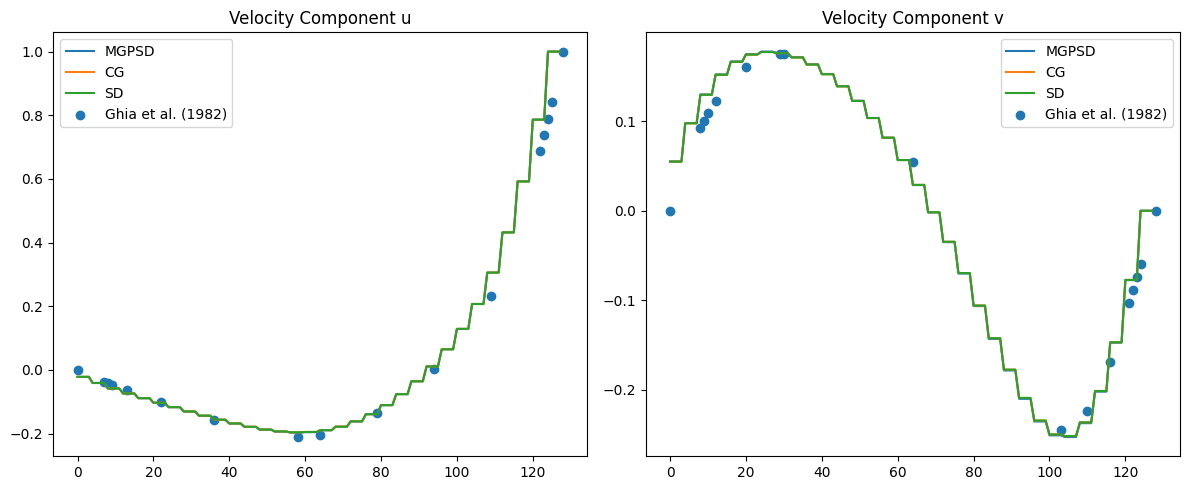

In [35]:
# Ghia et al. (1982) - Re = 100
reference_ux_RE_100 = {
    128: 1.00000,
    125: 0.84123,
    124: 0.78871,
    123: 0.73722,
    122: 0.68717,
    109: 0.23151,
    94: 0.00332,
    79: -0.13641,
    64: -0.20581,
    58: -0.21090,
    36: -0.15662,
    22: -0.10150,
    13: -0.06434,
    9: -0.04775,
    8: -0.04192,
    7: -0.03717,
    0: 0.00000
}

# Ghia et al. (1982) - Re = 100
reference_uy_RE_100 = {
    128: 0.00000,
    124: -0.05906,
    123: -0.07391,
    122: -0.08864,
    121: -0.10313,
    116: -0.16914,
    110: -0.22445,
    103: -0.24533,
    64: 0.05454,
    30: 0.17527,
    29: 0.17507,
    20: 0.16077,
    12: 0.12317,
    10: 0.10890,
    9: 0.10091,
    8: 0.09233,
    0: 0.00000
}

u_mgpsd = np.loadtxt("experiments/2d/mgpsd/u.dat")
v_mgpsd = np.loadtxt("experiments/2d/mgpsd/v.dat")
u_cg = np.loadtxt("experiments/2d/conjugate_gradient/u.dat")
v_cg = np.loadtxt("experiments/2d/conjugate_gradient/v.dat")
u_sd = np.loadtxt("experiments/2d/steepest_descent/u.dat")
v_sd = np.loadtxt("experiments/2d/steepest_descent/v.dat")

u_mgpsd = u_mgpsd[1:-1, 1:-1]
v_mgpsd = v_mgpsd[1:-1, 1:-1]
u_cg = u_cg[1:-1, 1:-1]
v_cg = v_cg[1:-1, 1:-1]
u_sd = u_sd[1:-1, 1:-1]
v_sd = v_sd[1:-1, 1:-1]

scale_factor = 4
u_mgpsd = np.kron(u_mgpsd, np.ones((scale_factor, scale_factor)))
v_mgpsd = np.kron(v_mgpsd, np.ones((scale_factor, scale_factor)))
u_cg = np.kron(u_cg, np.ones((scale_factor, scale_factor)))
v_cg = np.kron(v_cg, np.ones((scale_factor, scale_factor)))
u_sd = np.kron(u_sd, np.ones((scale_factor, scale_factor)))
v_sd = np.kron(v_sd, np.ones((scale_factor, scale_factor)))

# plot u
u_mgpsd = u_mgpsd[:, int(u_mgpsd.shape[1]/2)]
v_mgpsd = v_mgpsd[int(v_mgpsd.shape[0]/2), :]
u_cg = u_cg[:, int(u_cg.shape[1]/2)]
v_cg = v_cg[int(v_cg.shape[0]/2), :]
u_sd = u_sd[:, int(u_sd.shape[1]/2)]
v_sd = v_sd[int(v_sd.shape[0]/2), :]

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Create a figure with 2 subplots side by side

# Plot u and its reference
axes[0].plot(u_mgpsd, label="MGPSD")
axes[0].plot(u_cg, label="CG")
axes[0].plot(u_sd, label="SD")
axes[0].scatter(reference_ux_RE_100.keys(), reference_ux_RE_100.values(), label="Ghia et al. (1982)")
axes[0].set_title("Velocity Component u")
axes[0].legend()

# Plot v and its reference
axes[1].plot(v_mgpsd, label="MGPSD")
axes[1].plot(v_cg, label="CG")
axes[1].plot(v_sd, label="SD")
# plot v_mid as scatter plot
axes[1].scatter(reference_uy_RE_100.keys(), reference_uy_RE_100.values(), label="Ghia et al. (1982)")
axes[1].set_title("Velocity Component v")
axes[1].legend()

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()